<a href="https://colab.research.google.com/github/farnazmnz/Time-Series-Forecasting/blob/main/5_demand_fact_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('data_demand_fact_stock.xlsx')

In [ ]:
data

,Unnamed: 0,Date_x,GDS_x,PLN_GROUP_x,QUALITY_F_x,DES_EN_x,YYMM_x,Date & GDS & PLN,Demand,INVENTORY_QTY
0,0,28,16201007,BP,GS,SBS,140007,GS-16201007-140007-BP,35802,71733
1,1,28,16201007,BP,GS,SBS,140207,GS-16201007-140207-BP,63016,38801
2,2,28,16201007,BP,GS,SBS,140206,GS-16201007-140206-BP,58964,38297
3,3,28,16201007,BP,GS,SBS,140205,GS-16201007-140205-BP,57489,44956
4,4,28,16201007,BP,GS,SBS,140204,GS-16201007-140204-BP,58544,19138
...,...,...,...,...,...,...,...,...,...,...
344,344,103,16201034,BP,GS,SBS,140002,GS-16201034-140002-BP,4285,3366
345,345,103,16201034,BP,GS,SBS,140209,GS-16201034-140209-BP,7128,2840
346,346,103,16201034,BP,GS,SBS,140105,GS-16201034-140105-BP,10579,29659
347,347,103,16201034,BP,GS,SBS,140010,GS-16201034-140010-BP,17019,35364


In [ ]:
data['Date_x'].value_counts()

Date_x
50     33
56     33
68     33
102    33
103    33
35     32
57     32
28     31
85     31
49     30
41     28
Name: count, dtype: int64

In [ ]:
dfs = {}

for i in range(0, 103):
    dfs[i] = data[data['Date_x'] == i]

In [ ]:
dfs[50] = dfs[50].sort_values(by='YYMM_x', ascending=True)

In [ ]:
df = dfs[50]

In [ ]:
df = df.drop(columns=['Unnamed: 0' ,'Date_x' ,'GDS_x' ,'PLN_GROUP_x' ,'QUALITY_F_x' ,'DES_EN_x' ,'YYMM_x', 'Date & GDS & PLN'])

In [ ]:
df

,Demand,INVENTORY_QTY
138,1136,1103
153,881,6191
140,794,8186
141,1385,13961
142,1400,20483
145,1488,20483
143,855,26458
144,6482,31448
152,6566,26300
146,4434,28657


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

### LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import BatchNormalization, Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
df_lstm = df.copy()

In [ ]:
features = df_lstm.drop(columns=['Demand']).values
target = df_lstm['Demand'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model_lstm = Sequential()
model_lstm.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(units=64, return_sequences=True))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(units=1, kernel_regularizer=l2(0.001)))
model_lstm.add(Activation('linear'))

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

predictions = model_lstm.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

C:\Users\IDS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 24058958.0000
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 24058812.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 24058828.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 24058698.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 24058386.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 24058046.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 24057726.0000
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 24057432.0000
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 24057124.0000
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 24056790.0000
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 24056444.0000
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 24056088.0000
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 24055650.0000
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 24055308.0000
Epo

In [ ]:
next_12_data = df_lstm.iloc[-12:].drop(columns=['Demand']).values
next_12_data = np.reshape(next_12_data, (next_12_data.shape[0], 1, next_12_data.shape[1]))
next_12_predictions = model_lstm.predict(next_12_data).flatten()
print("Next 12 Predictions:", next_12_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
Next 12 Predictions: [0.1894304  0.1715109  0.2027772  0.16719075 0.20029794 0.16466956
 0.15224168 0.20356299 0.20356572 0.20356525 0.20356514 0.20356572]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lstm.columns)
df_to_append['Demand'] = next_12_predictions.flatten()
for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0
df_lstm = pd.concat([df_lstm, df_to_append], ignore_index=True)

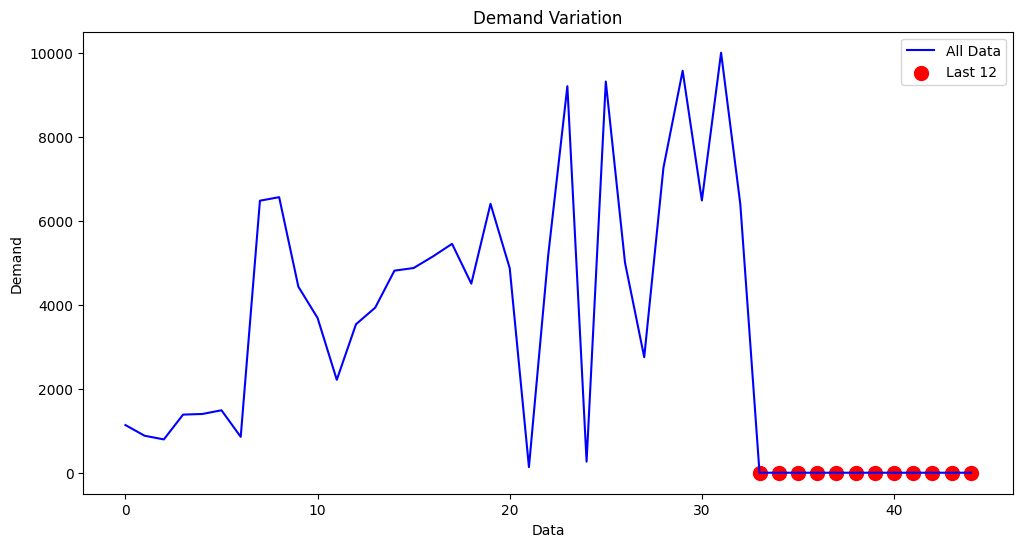

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lstm.index, df_lstm['Demand'], label='All Data', color='blue')
plt.scatter(df_lstm.index[-12:], df_lstm['Demand'].tail(12), color='red', label='Last 12', s=100)
plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()
plt.show()

In [ ]:
df_lstm['Percentage Change'] = df_lstm['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lstm['Percentage Change'] >= -tolerance) & (df_lstm['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

df_lr = df.copy()

features = df_lr.drop(columns=['Demand'])
target = df_lr['Demand'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 7544356.313011176


In [ ]:
next_12_data = df_lr.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_lr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [4060.70845647 4063.71164745 4048.87738022 4064.13380419 4055.06544991
 4064.34755444 4065.13308661 4018.16146955 3992.05187672 4008.08848909
 4009.57405332 3992.14806433]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_lr = pd.concat([df_lr, df_to_append], ignore_index=True)

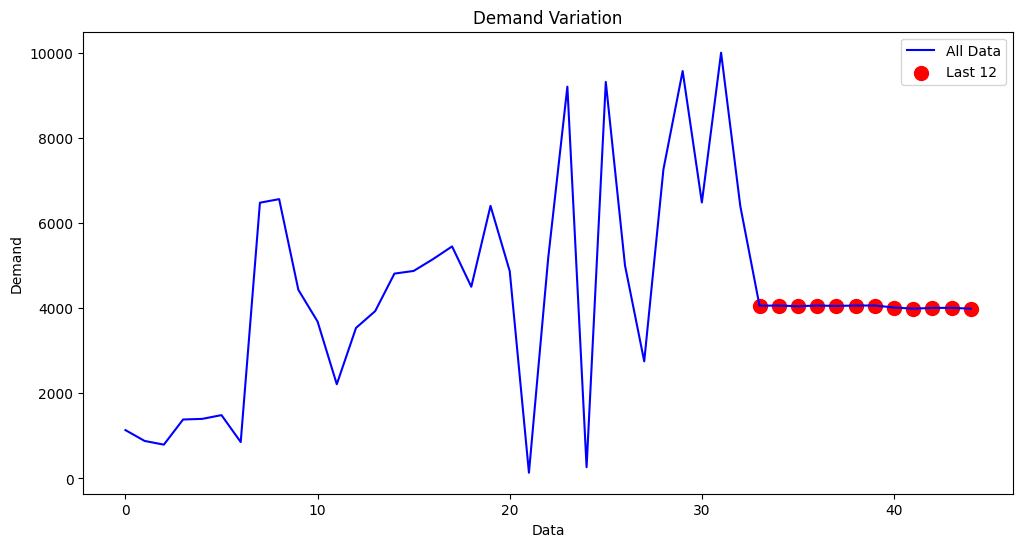

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lr.index, df_lr['Demand'], label='All Data', color='blue')
plt.scatter(df_lr.index[-12:], df_lr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_lr

,Demand,INVENTORY_QTY
0,1136.000000,1103
1,881.000000,6191
2,794.000000,8186
3,1385.000000,13961
4,1400.000000,20483
5,1488.000000,20483
6,855.000000,26458
7,6482.000000,31448
8,6566.000000,26300
9,4434.000000,28657


In [ ]:
df_lr['Percentage Change'] = df_lr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lr['Percentage Change'] >= -tolerance) & (df_lr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### SVR

In [ ]:
from sklearn.svm import SVR

df_svr = df.copy()

features = df_svr.drop(columns=['Demand'])
target = df_svr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_svr = SVR(kernel='linear')

model_svr.fit(X_train, y_train)

predictions = model_svr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 9266768.08695721


In [ ]:
next_12_data = df_svr.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_svr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [3455.89244536 3448.82949611 3483.71694652 3447.83666161 3469.16375217
 3447.33396059 3445.48653437 3555.9550823  3617.36001134 3579.64486766
 3576.15109557 3617.13379586]


In [ ]:
df_to_append = pd.DataFrame(columns=df_svr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_svr = pd.concat([df_svr, df_to_append], ignore_index=True)

In [ ]:
df_svr

,Demand,INVENTORY_QTY
0,1136.000000,1103
1,881.000000,6191
2,794.000000,8186
3,1385.000000,13961
4,1400.000000,20483
5,1488.000000,20483
6,855.000000,26458
7,6482.000000,31448
8,6566.000000,26300
9,4434.000000,28657


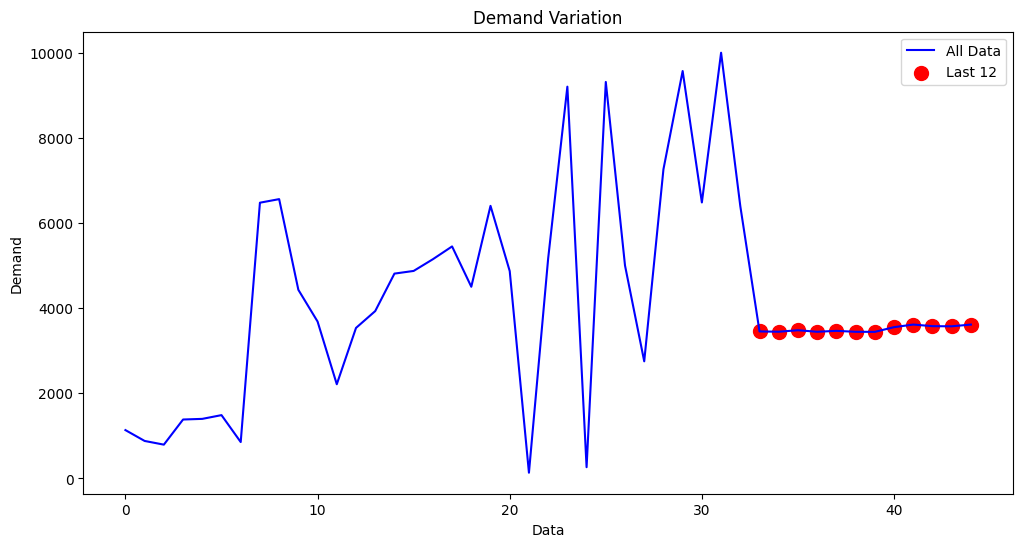

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_svr.index, df_svr['Demand'], label='All Data', color='blue')
plt.scatter(df_svr.index[-12:], df_svr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_svr['Percentage Change'] = df_svr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_svr['Percentage Change'] >= -tolerance) & (df_svr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

df_dt = df.copy()

features = df_svr[['INVENTORY_QTY']]
target = df_svr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train)

predictions = model_dt.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 12163341.267022304


In [ ]:
next_12_data = df_dt.iloc[-12:][['INVENTORY_QTY']]
next_12_predictions = model_dt.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [  635.  5169.  9210.   264.   635.   264.  2753.  7267.  9577.  6488.
 10008.  6402.]


In [ ]:
df_to_append = pd.DataFrame(columns=df_dt.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_dt = pd.concat([df_dt, df_to_append], ignore_index=True)

In [ ]:
df_dt

,Demand,INVENTORY_QTY
0,1136.0,1103
1,881.0,6191
2,794.0,8186
3,1385.0,13961
4,1400.0,20483
5,1488.0,20483
6,855.0,26458
7,6482.0,31448
8,6566.0,26300
9,4434.0,28657


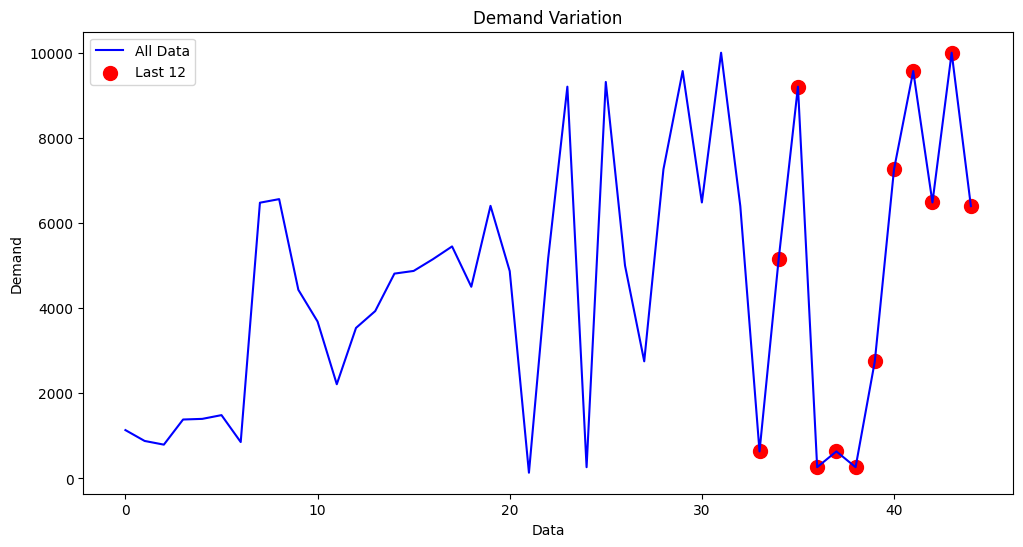

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_dt.index, df_dt['Demand'], label='All Data', color='blue')
plt.scatter(df_dt.index[-12:], df_dt['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_dt['Percentage Change'] = df_dt['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_dt['Percentage Change'] >= -tolerance) & (df_dt['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

df_rf = df.copy()

features = df_rf.drop(columns=['Demand'])
target = df_rf['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 12913163.808732146


In [ ]:
next_12_data = df_rf.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_rf.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [1202.101 3702.005 8118.11  1494.755 6380.13  1494.755 2178.465 5668.26
 7521.94  6056.32  5243.7   6681.9  ]


In [ ]:
df_to_append = pd.DataFrame(columns=df_rf.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_rf = pd.concat([df_rf, df_to_append], ignore_index=True)

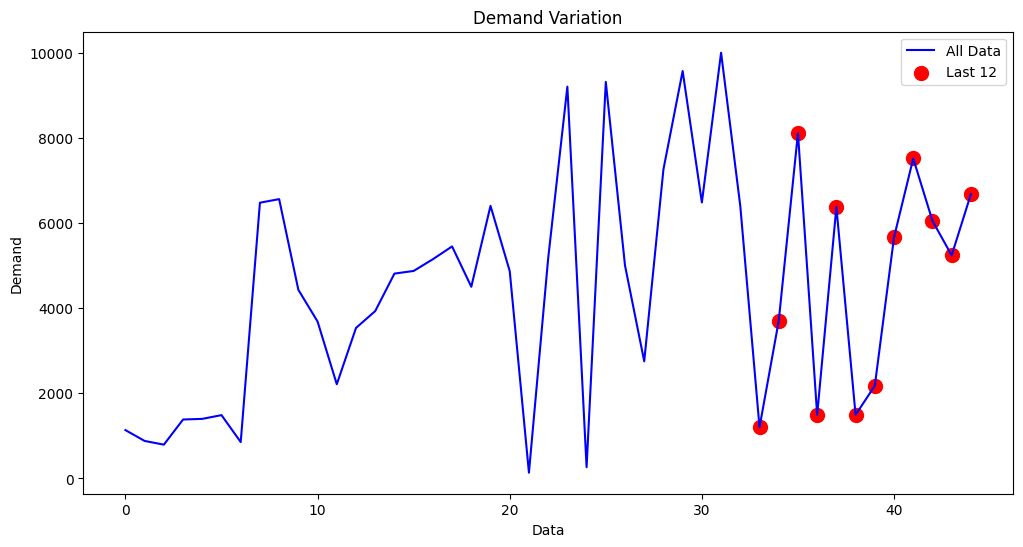

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_rf.index, df_rf['Demand'], label='All Data', color='blue')
plt.scatter(df_rf.index[-12:], df_rf['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_rf['Percentage Change'] = df_rf['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_rf['Percentage Change'] >= -tolerance) & (df_rf['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.
